Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'data/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'data/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[164.25 157.25 164.25]
   [153.5  146.5  153.5 ]
   [133.   126.   133.  ]
   ...
   [121.75 110.75 114.75]
   [125.   114.   118.  ]
   [134.   123.   127.  ]]

  [[163.25 156.25 163.25]
   [137.   130.   137.  ]
   [164.25 157.25 164.25]
   ...
   [148.25 137.25 141.25]
   [147.25 136.25 140.25]
   [137.25 126.25 130.25]]

  [[141.75 134.75 141.75]
   [152.25 145.25 152.25]
   [141.25 134.25 141.25]
   ...
   [130.5  119.5  123.5 ]
   [135.   124.   128.  ]
   [139.75 128.75 132.75]]

  ...

  [[196.25 191.25 195.25]
   [192.5  187.5  191.5 ]
   [188.75 183.75 187.75]
   ...
   [160.25 151.25 154.25]
   [175.5  166.5  169.5 ]
   [152.75 143.75 146.75]]

  [[192.75 187.75 191.75]
   [198.25 193.25 197.25]
   [192.75 187.75 191.75]
   ...
   [162.75 153.75 156.75]
   [165.75 156.75 159.75]
   [163.5  154.5  157.5 ]]

  [[187.5  182.5  186.5 ]
   [194.25 189.25 193.25]
   [197.75 192.75 196.75]
   ...
   [166.5  157.5  160.5 ]
   [168.   159.   162.  ]
   [140.5  131.5  13

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=3)

Epoch 1/3
2197/2197 [==============================] - 829s 377ms/step - loss: 0.6828 - accuracy: 0.7873 - val_loss: 0.4640 - val_accuracy: 0.8588
Epoch 2/3
2197/2197 [==============================] - 783s 356ms/step - loss: 0.3410 - accuracy: 0.8918 - val_loss: 0.2464 - val_accuracy: 0.9243
Epoch 3/3
2197/2197 [==============================] - 799s 364ms/step - loss: 0.2270 - accuracy: 0.9263 - val_loss: 0.2363 - val_accuracy: 0.9257


In [22]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 186s 85ms/step - loss: 0.1604 - accuracy: 0.9490


In [23]:
print(train_loss,train_acc)

0.16042950749397278 0.9489579796791077


In [24]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 49s 88ms/step - loss: 0.2363 - accuracy: 0.9257


In [25]:
print(val_loss,val_acc)

0.23632343113422394 0.9256772398948669


MARKDOWN

In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'loss': [0.6827632784843445, 0.34101423621177673, 0.2270200550556183],
 'accuracy': [0.787253737449646, 0.8918415307998657, 0.9262678623199463],
 'val_loss': [0.4639902710914612, 0.2464473396539688, 0.2363233119249344],
 'val_accuracy': [0.8588094711303711, 0.9242544770240784, 0.9256772398948669]}

In [28]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [29]:
training_history.history['val_accuracy']

[0.8588094711303711, 0.9242544770240784, 0.9256772398948669]

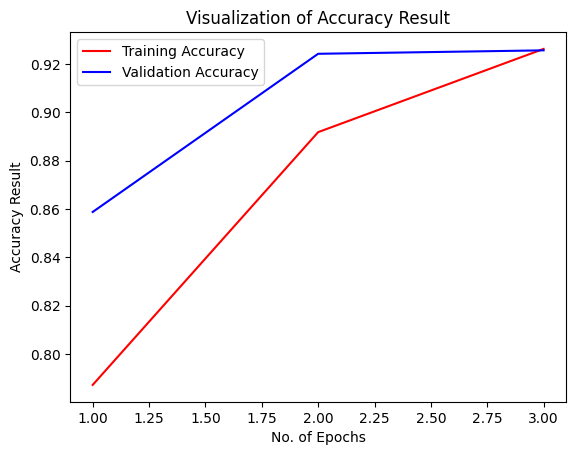

In [33]:
epochs = [i for i in range(1,4)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [34]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'data/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 47s 85ms/step


(array([[7.86327302e-01, 1.32732868e-01, 1.03238992e-04, ...,
         6.26530891e-07, 6.25158748e-07, 2.94465517e-05],
        [1.60957992e-01, 7.72077262e-01, 4.79401438e-04, ...,
         3.95170264e-06, 6.24761060e-06, 2.85399801e-05],
        [9.49429452e-01, 5.02657294e-02, 5.41320242e-06, ...,
         6.73507861e-10, 2.70949374e-09, 4.84348099e-08],
        ...,
        [1.72915929e-06, 4.04938731e-08, 1.52122575e-05, ...,
         2.07647474e-07, 4.96771904e-08, 9.98896718e-01],
        [2.10072358e-05, 4.68754649e-07, 3.63918698e-05, ...,
         8.73246609e-06, 3.73515536e-06, 9.98525321e-01],
        [5.02947850e-10, 2.90804769e-10, 9.92092936e-11, ...,
         2.37138295e-11, 2.72204481e-09, 9.99943972e-01]], dtype=float32),
 (17572, 38))

In [37]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [38]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  1,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.80      0.87       504
                                 Apple___Black_rot       0.86      0.99      0.92       497
                          Apple___Cedar_apple_rust       0.93      0.93      0.93       440
                                   Apple___healthy       0.92      0.92      0.92       502
                               Blueberry___healthy       0.99      0.90      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.90      0.94       421
                 Cherry_(including_sour)___healthy       0.93      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.90      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

In [43]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[405,  28,   5, ...,   0,   0,   0],
       [  0, 491,   0, ...,   0,   0,   0],
       [  0,   0, 411, ...,   0,   0,   2],
       ...,
       [  0,   0,   3, ..., 465,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   0, 472]], dtype=int64)

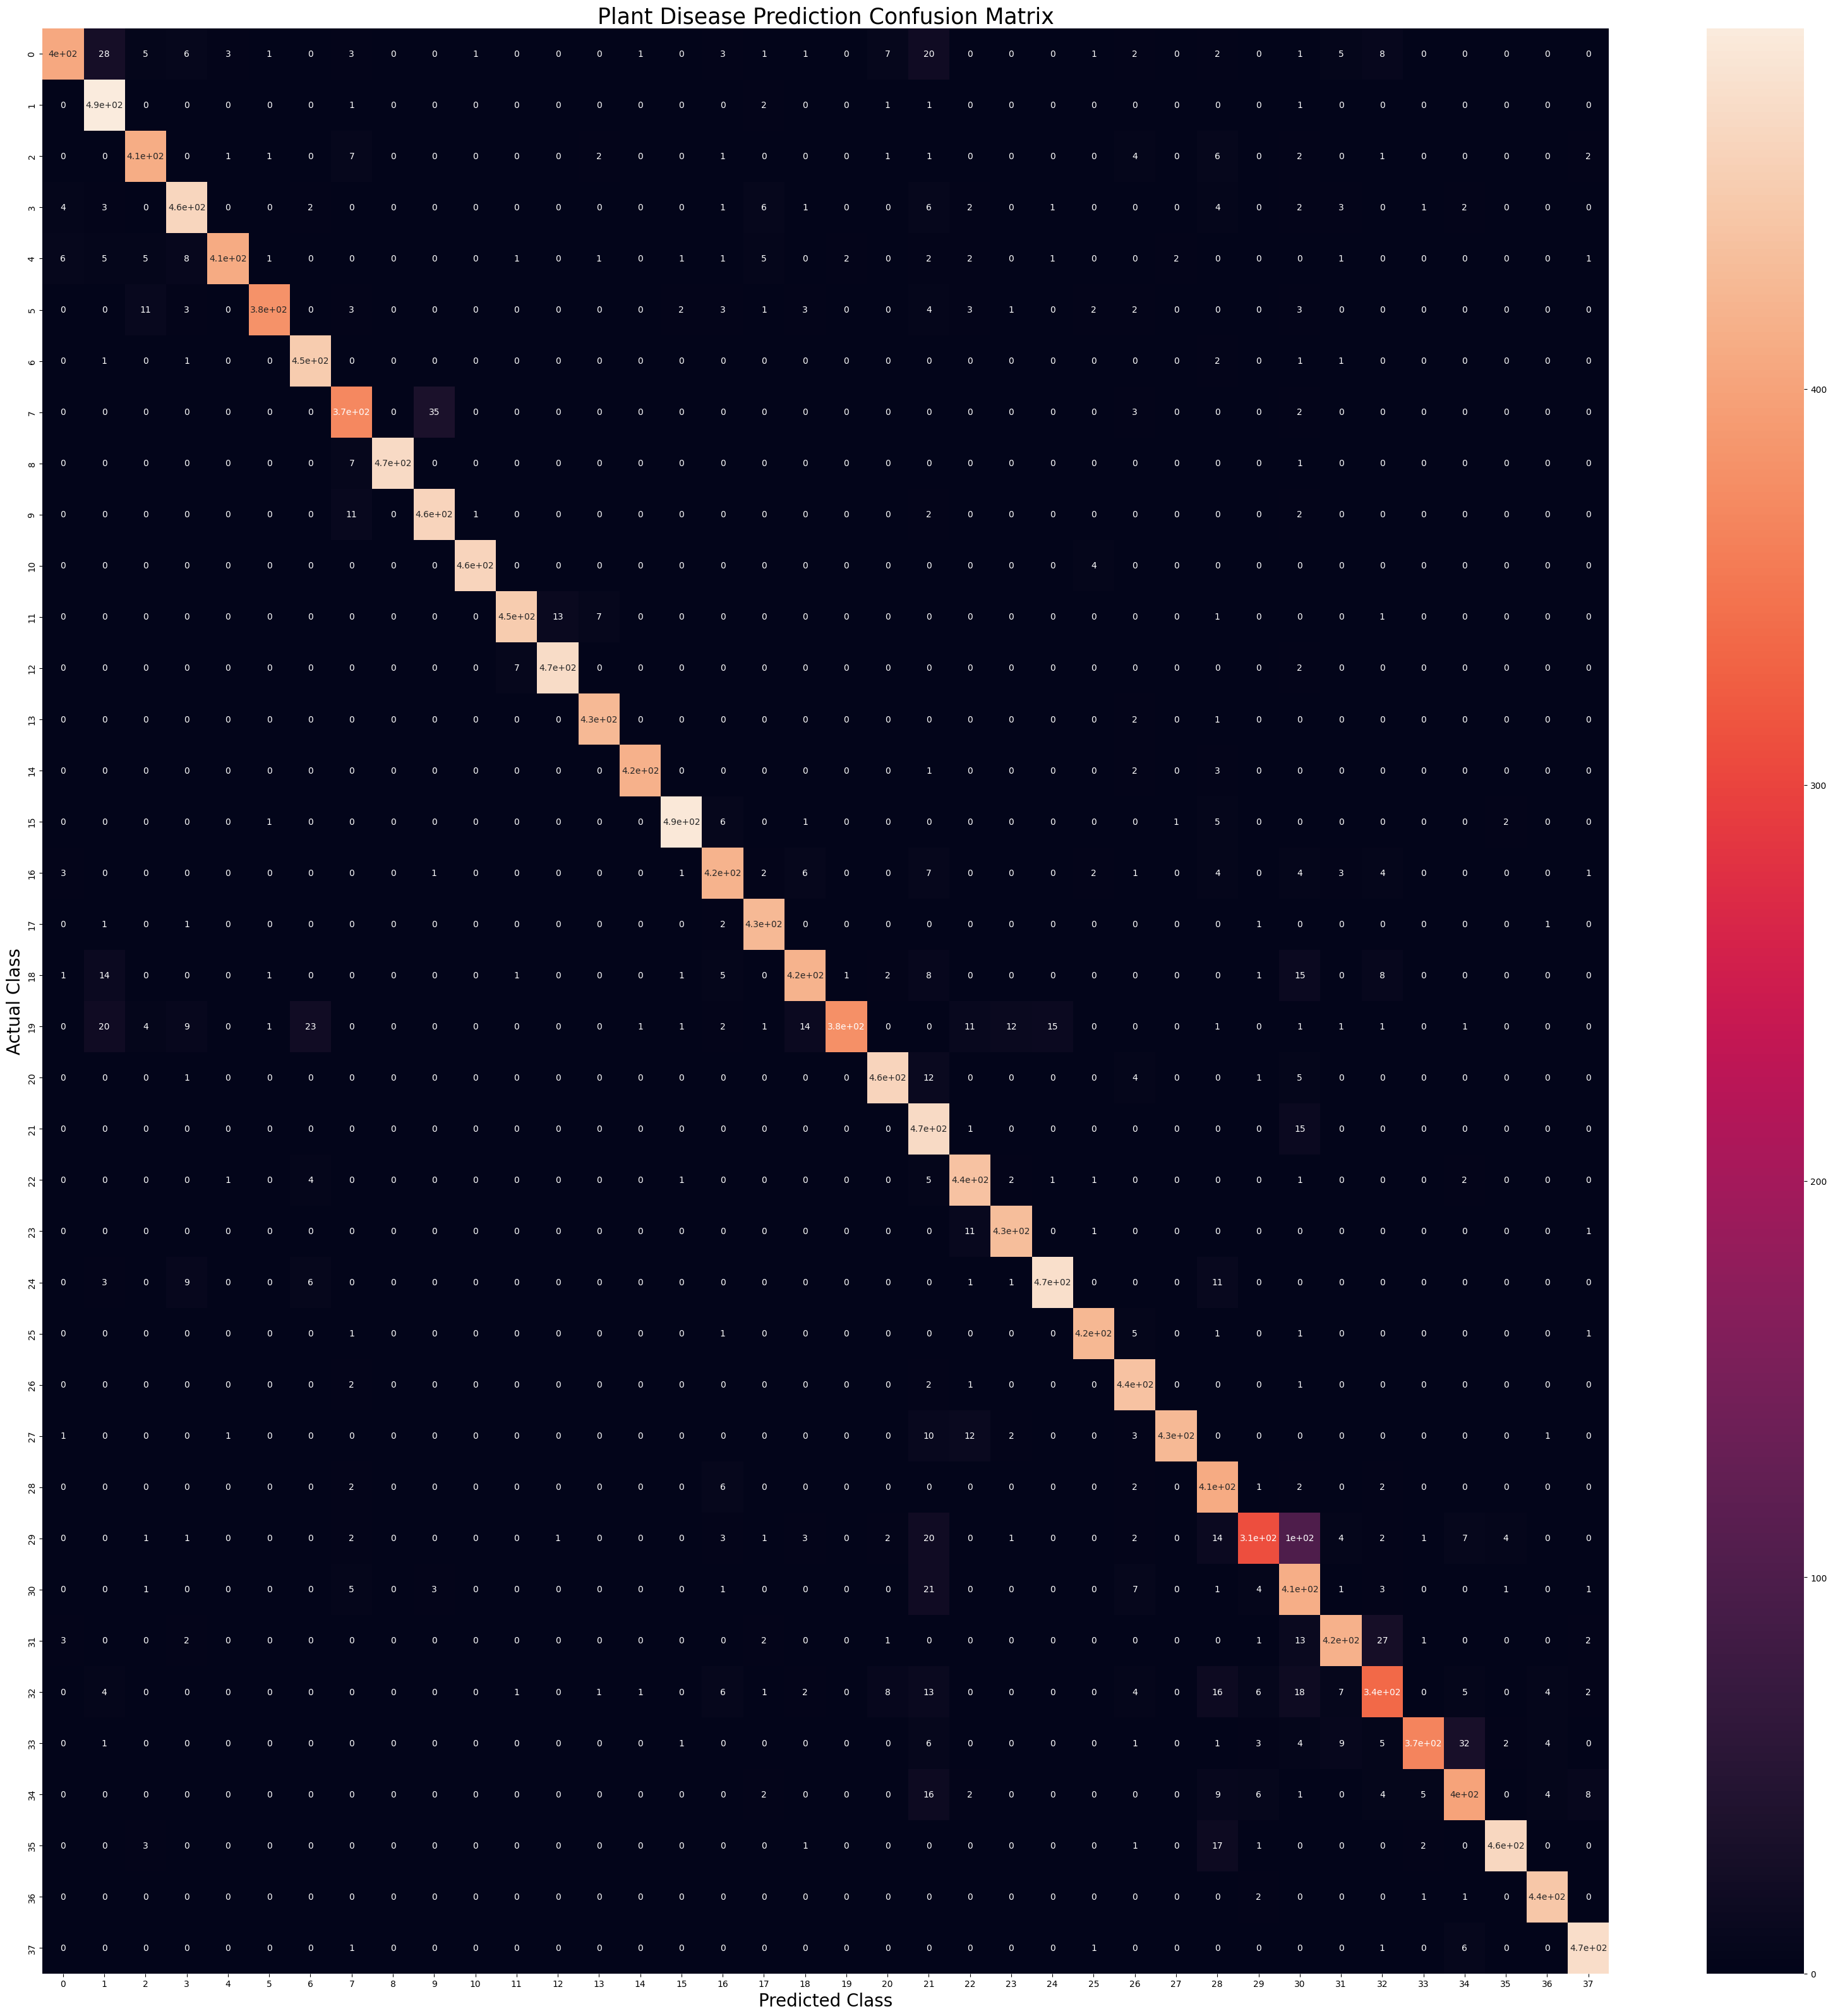

In [44]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()